Datasets Chosen :


1.   Breast Cancer : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

2.   HCV data : http://archive.ics.uci.edu/ml/datasets/HCV+data

3. Glass Identification dataset : https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

# 3.1. Comparison of DR Techniques

In [ ]:
def sammon(X, iter, e, alpha=0.3):
    y = np.random.rand(X.shape[0],2)
    ite = 0
    while(True):
        ite+=1
        stress = 0
        #compute the stress E on Y
        sum_delta = 0
        sum_frac = 0
        
        for i in range(X.shape[0]):
            for j in range(i):
                original_space_dist = np.linalg.norm(X[i]-X[j])
                transformed_space_dist = np.linalg.norm(y[i]-y[j])
                sum_delta += original_space_dist
                
                sum_frac += (((original_space_dist - transformed_space_dist)**2)/original_space_dist)
                

        stress = (1/sum_delta) * (sum_frac)
        #print(stress)
        
        y_new = np.zeros_like(y)
        for i in range(y.shape[0]):
            #update y(t+1)
            derivative_1 = np.zeros(2)
            derivative_2 = np.zeros(2)

            for j in range(y.shape[0]):
                if(i != j):
                    original_space_dist = np.linalg.norm(X[i]-X[j])
                    transformed_space_dist = np.linalg.norm(y[i]-y[j])
                    a = (original_space_dist - transformed_space_dist) / (original_space_dist * transformed_space_dist)
                    derivative_1 += (a*(y[i]-y[j]))

                    b = 1/ (original_space_dist * transformed_space_dist)
                    c = (original_space_dist - transformed_space_dist) - (((y[i]-y[j])**2)/transformed_space_dist)*(1+((original_space_dist - transformed_space_dist)/transformed_space_dist))
                    derivative_2 += (b * c)
            derivative_1 = (-2/sum_delta) * (derivative_1)
            derivative_2 = (-2/sum_delta) * (derivative_2)


            try:
                y_new[i] = y[i] - alpha * (derivative_1/derivative_2)

            except ZeroDivisionError:
                y_new[i] = y[i] - alpha * (derivative_1/np.array([0.000001,0.000001]))
        y = y_new.copy()    
        #print(y[0])
        if((ite >= iter) or (stress < e)):
            break
    return y

In [ ]:
wdbc = pd.read_csv('wdbc.data', header=None).drop([0], axis=1)
wdbc.loc[wdbc[1] == 'M', 1] = 1
wdbc.loc[wdbc[1] == 'B', 1] = 0
glass = pd.read_csv('glass.data', header=None).drop([0], axis=1)
duplicateRowsDF = glass[glass.duplicated()]
glass = glass.drop(duplicateRowsDF.index[0], axis=0)
hcv = pd.read_csv('hcvdat0.csv').drop('Unnamed: 0', axis=1).dropna()
hcv['Category'] = hcv['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis' : 2, '2=Fibrosis' : 3, '3=Cirrhosis' : 4  })
hcv.loc[hcv['Sex'] == 'f', 'Sex'] = 1
hcv.loc[hcv['Sex'] == 'm', 'Sex'] = 0

In [ ]:
X_wdbc = StandardScaler().fit_transform(wdbc.loc[:,2:])
X_glass = StandardScaler().fit_transform(glass.loc[:,:9])
X_hcv = StandardScaler().fit_transform(hcv.drop('Category', axis=1))

y_wdbc = wdbc.loc[:,1]
y_glass = glass.loc[:,10]
y_hcv = hcv['Category']

In [ ]:
print("Starting with X_wdbc")
X_pca_w = PCA(n_components=2).fit_transform(X_wdbc)

X_tsne_w = TSNE(n_components=2).fit_transform(X_wdbc)

X_sammon_w = sammon(X_wdbc,30,0.1)

print("Starting with X_glass")
X_pca_g = PCA(n_components=2).fit_transform(X_glass)

X_tsne_g = TSNE(n_components=2).fit_transform(X_glass)

X_sammon_g = sammon(X_glass,30,0.1)

print("Starting with X_hcv")
X_pca_h = PCA(n_components=2).fit_transform(X_hcv)

X_tsne_h = TSNE(n_components=2).fit_transform(X_hcv)

X_sammon_h = sammon(X_hcv,30,0.1)

Starting with X_wdbc
Starting with X_glass
Starting with X_hcv


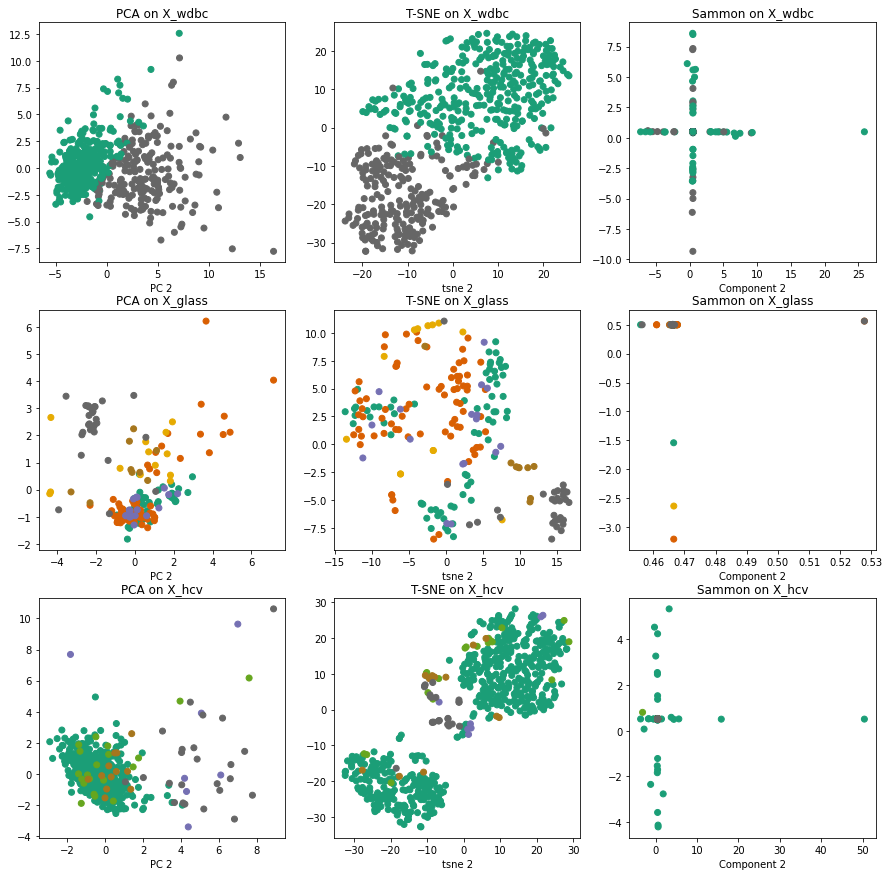

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.scatter(X_pca_w[:,0], X_pca_w[:,1], c = y_wdbc, cmap = 'Dark2')
plt.title('PCA on X_wdbc')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,2)
plt.scatter(X_tsne_w[:,0], X_tsne_w[:,1], c = y_wdbc, cmap = 'Dark2' )
plt.title('T-SNE on X_wdbc')
plt.xlabel('tsne 1')
plt.xlabel('tsne 2')

plt.subplot(3,3,3)
plt.scatter(X_sammon_w[:,0], X_sammon_w[:,1], c = y_wdbc, cmap = 'Dark2')
plt.title('Sammon on X_wdbc')
plt.xlabel('Component 1')
plt.xlabel('Component 2')

plt.subplot(3,3,4)
plt.scatter(X_pca_g[:,0], X_pca_g[:,1], c = y_glass, cmap = 'Dark2')
plt.title('PCA on X_glass')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,5)
plt.scatter(X_tsne_g[:,0], X_tsne_g[:,1], c = y_glass, cmap = 'Dark2')
plt.title('T-SNE on X_glass')
plt.xlabel('tsne 1')
plt.xlabel('tsne 2')

plt.subplot(3,3,6)
plt.scatter(X_sammon_g[:,0], X_sammon_g[:,1], c =y_glass, cmap = 'Dark2')
plt.title('Sammon on X_glass')
plt.xlabel('Component 1')
plt.xlabel('Component 2')

plt.subplot(3,3,7)
plt.scatter(X_pca_h[:,0], X_pca_h[:,1], c =y_hcv, cmap = 'Dark2')
plt.title('PCA on X_hcv')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,8)
plt.scatter(X_tsne_h[:,0], X_tsne_h[:,1], c = y_hcv, cmap = 'Dark2')
plt.title('T-SNE on X_hcv')
plt.xlabel('tsne 1')
plt.xlabel('tsne 2')

plt.subplot(3,3,9)
plt.scatter(X_sammon_h[:,0], X_sammon_h[:,1], c =y_hcv, cmap = 'Dark2')
plt.title('Sammon on X_hcv')
plt.xlabel('Component 1')
plt.xlabel('Component 2')

plt.show()

### 1. In your opinion, which technique performed the best for each data set, regarding the separation of the classes?

Regarding the seperation of classes, T-SNE has performed best on all the three datasets(X_wdbc, X_glass, X_hcv). and also PCA performed well on X_wdbc dataset when compared with X_glass and X_hcv. The results of sammon were quiet dissatisfying on three datasets. 

### 2. How are the classes in the data sets separated? Are some classes / data sets easier to separate than others?

The classes in data sets are sepearted based on their distances. Some classes in data sets are not that much easy because they have very close distances and seperation of classes become difficult. 

# 3.2. Comparison of Clustering Techniques

In [ ]:
def bkmeans(X, K, iter):
    min_sse = np.inf
    centroids_list = []
    labels_list = []
    for i in range(iter):
        clf = KMeans(n_clusters=2)
        clf.fit(X)
        if(clf.inertia_ < min_sse):
            centroids = clf.cluster_centers_
            labels = clf.labels_
    centroids_list.append(centroids[0])
    centroids_list.append(centroids[1])
    labels_list = labels

    while(len(centroids_list) < K):
        max_sse = -np.inf
        
        #find the cluster with largest SSE to divide into 2 clusters
        for i in range(len(centroids_list)):
            points = X[labels_list == i]
            sse = 0
            for j in range(len(points)):
                sse += np.sum((points[j] - centroids_list[i])**2)       
            if(max_sse < sse ):
                max_sse = sse
                index = i
        
        labels_list[labels_list == index] = -1
        
        cluster_indices = np.where(labels_list == -1)[0]

        if(max(labels_list) > index):
            labels_list[labels_list > index] = labels_list[labels_list > index] - 1
          
        del centroids_list[index]
        
        min_sse = np.inf
        for i in range(iter):
            clf = KMeans(n_clusters=2)
            clf.fit(X[labels_list == -1])
            if(clf.inertia_ < min_sse):
                centroids = clf.cluster_centers_
                labels = clf.labels_
        labels = labels + max(labels_list)+1
        centroids_list.append(centroids[0])
        centroids_list.append(centroids[0])
        labels_list[cluster_indices] = labels
    return  labels_list


In [ ]:
print("Number of classes for WDBC dataset : ", len(set(y_wdbc)))
print("Number of classes for Glass dataset : ", len(set(y_glass)))
print("Number of classes for HCV dataset : ", len(set(y_hcv)))

Number of classes for WDBC dataset :  2
Number of classes for Glass dataset :  6
Number of classes for HCV dataset :  5


In [ ]:
kmeans_wdbc = KMeans(n_clusters=2).fit(X_pca_w).labels_
kmeans_glass = KMeans(n_clusters=6).fit(X_pca_g).labels_
kmeans_hcv = KMeans(n_clusters=5).fit(X_pca_h).labels_

agg_wdbc = AgglomerativeClustering(n_clusters=2).fit(X_pca_w).labels_
agg_glass = AgglomerativeClustering(n_clusters=6).fit(X_pca_g).labels_
agg_hcv = AgglomerativeClustering(n_clusters=5).fit(X_pca_h).labels_

bkmeans_wdbc = bkmeans(X_pca_w, 2, 10)
bkmeans_glass = bkmeans(X_pca_g, 6, 10)
bkmeans_hcv = bkmeans(X_pca_h, 5, 10)


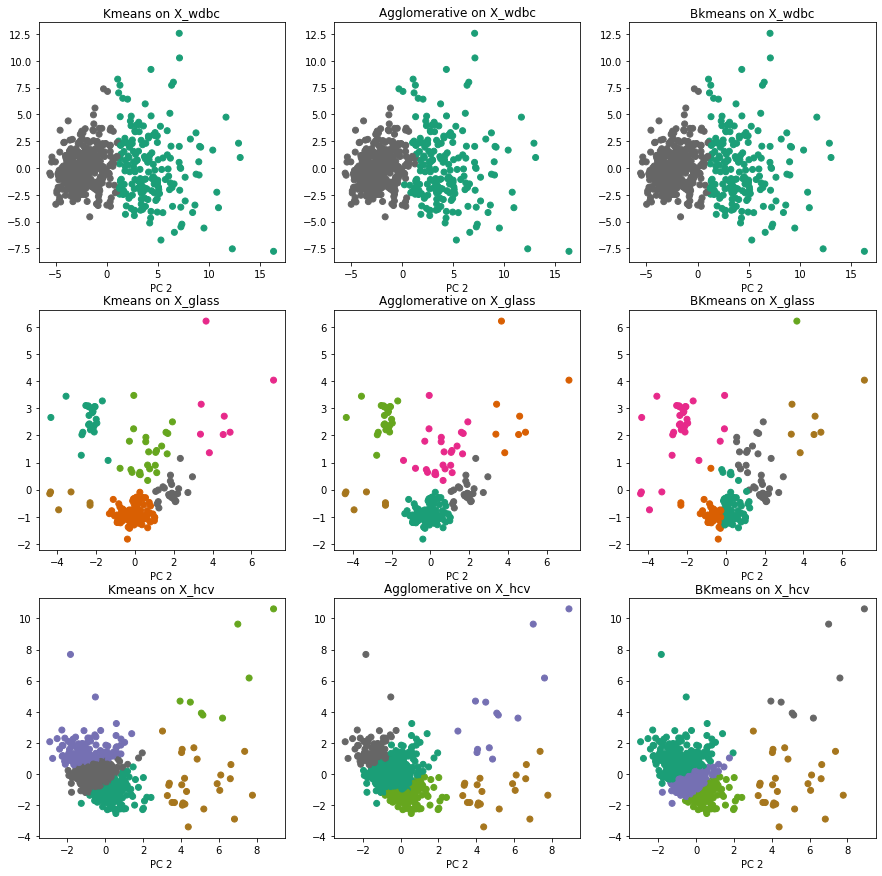

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.scatter(X_pca_w[:,0], X_pca_w[:,1], c = kmeans_wdbc, cmap = 'Dark2')
plt.title('Kmeans on X_wdbc')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,2)
plt.scatter(X_pca_w[:,0], X_pca_w[:,1], c = agg_wdbc, cmap = 'Dark2' )
plt.title('Agglomerative on X_wdbc')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,3)
plt.scatter(X_pca_w[:,0], X_pca_w[:,1], c = bkmeans_wdbc, cmap = 'Dark2')
plt.title('Bkmeans on X_wdbc')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,4)
plt.scatter(X_pca_g[:,0], X_pca_g[:,1], c = kmeans_glass, cmap = 'Dark2')
plt.title('Kmeans on X_glass')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,5)
plt.scatter(X_pca_g[:,0], X_pca_g[:,1], c = agg_glass, cmap = 'Dark2')
plt.title('Agglomerative on X_glass')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,6)
plt.scatter(X_pca_g[:,0], X_pca_g[:,1], c =bkmeans_glass, cmap = 'Dark2')
plt.title('BKmeans on X_glass')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,7)
plt.scatter(X_pca_h[:,0], X_pca_h[:,1], c =kmeans_hcv, cmap = 'Dark2')
plt.title('Kmeans on X_hcv')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,8)
plt.scatter(X_pca_h[:,0], X_pca_h[:,1], c = agg_hcv, cmap = 'Dark2')
plt.title('Agglomerative on X_hcv')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.subplot(3,3,9)
plt.scatter(X_pca_h[:,0], X_pca_h[:,1], c =bkmeans_hcv, cmap = 'Dark2')
plt.title('BKmeans on X_hcv')
plt.xlabel('PC 1')
plt.xlabel('PC 2')

plt.show()

### In your opinion, which clustering technique performed the best for each data set? And why?

All the three clustering techniques(Kmeans, Agglomerative,BKmeans) performed well for three data sets(X_wdbc, X_glass, X_hcv).